## Theorem 0.0.2 (Approximate Caratheodory's Theorem)
In this lab we run through the proof of approximate Caratheodory, keeping an example to work with as we go.

**Theorem 0.0.2** (Generalized)**.** *Consider a set $T \subset \mathbb{R}^n$. Then, for every point $x \in \text{conv}(T)$ and every integer $k$, one can find points $x_1,\ldots,x_k \in T$ such that*
$$ \left\lVert x - \frac{1}{k}\sum_{j=1}^k x_j \right\rVert \leq \frac{\text{diam}(T)}{\sqrt k}$$

In [74]:
# Some useful imports
import matplotlib.pyplot as plt
import numpy as np
import random as rand
import math

# Here we give a set T in Rn and integer k to work with

T = [np.array(arr) for arr in
    [[1,0,0],
    [0,1,0],
    [0,0,1],
    [0,0,0]]]

n = len(T[0])
k = 5


To follow along in our example, our task is to find some $x \in \text{conv}(T)$ and express it as a convex combination of vectors in $T$. Say $|T| = m$.

In [75]:
m = len(T)

Recalling the definition of the convex hull, this amounts to finding an assignment of coefficients $\lambda_1, \ldots, \lambda_m$, so that $\lambda_1 + \cdots + \lambda_m = 1$ and $\lambda_1,\ldots,\lambda_m \geq 0$.

Below we present one way of doing this, but it would be nice to be able to sample more uniformly from $\text{conv}(T)$. See if you can improve it!

In [76]:
# Here we fix a point in conv(T) and express it as 
# a convex combination of vectors in T

# The output is a list of lambda_1,...,lambda_m
def sample_coefficients(T):
    coefs = [0]*len(T) # initialize numpy array
    perm = np.random.permutation(len(T)) # permute 0,...,m-1
    accum = 1.0
    for i in perm[:-1]:
        # sample from viable range
        coefs[i] = np.random.uniform(0,accum)
        accum = accum - coefs[i]
    coefs[perm[-1]] = accum
    return coefs

coefficients = sample_coefficients(T)

We can now get $x \in \text{conv}(T)$ with $x = \lambda_1 z_1 + \cdots + \lambda_m z_m$.

In [77]:
x = np.zeros(n)
for i in range(m):
    x = x + coefficients[i] * T[i]
print(x)

[0.25995025 0.08592768 0.48270958]


Now, interpret the definition of convex combination probabilistically, with $\lambda_i$ taking the roles of probabilities. Specifically, we can define a random vector $Z$ that takes values $z_i$ with probabilities $\lambda_i$:
$$
\mathbb P \{Z = z_i\} = \lambda_i, \ \ \ i = 1, \ldots, m.
$$

In [78]:
# We can sample from the distribution of this random variable as follows:
Z_sample = rand.choices(T, weights = coefficients)
print(Z_sample)

[array([1, 0, 0])]


Consider independent copies $Z_1, \ldots, Z_k$ of $Z$. Then we are interested in the random variable 
$$\left\lVert x - \frac{1}{k} \sum_{j=1}^k Z_j \right\rVert_2^2$$.

In [102]:
# Here is a function that samples from the above distribution, 
# along with returning the assignments of to Z_1,...,Z_k
def sample_from_distribution():
    vectors = rand.choices(T, weights = coefficients, k = k)
    vec_sum = np.zeros(len(T[0]))
    for vec in vectors:
        vec_sum = vec_sum + vec
    distance = np.sum((x - vec_sum/k)**2)
    return distance, vectors

In the proof of the theorem it is shown that 
$$\mathbb E \left\lVert x - \frac{1}{k} \sum_{j=1}^k Z_j \right\rVert_2^2 \leq \frac{\text{diam}^2(T)}{k}.$$
Verify that this generalization to any set $T$ is correct.
We must first find ${diam}(T),$ which we do below.

In [106]:
# Computing diam(T)
diamT = 0
for i in range(len(T)):
    for j in range(i+1, len(T)):
        d_xixj = np.sqrt(np.sum((T[i] - T[j])**2))
        diamT = d_xixj if (d_xixj > diamT) else diamT

We can now check the inequality from above.

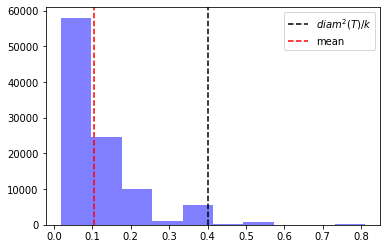

Best assignment (with value 0.017818472630454947 ): 
[array([1, 0, 0]), array([0, 0, 1]), array([0, 0, 0]), array([0, 0, 0]), array([0, 0, 1])]


In [114]:
numSamples = 100000
samples = []

bestVal = float("inf")
best = None
for i in range(numSamples):
    sample, vectors = sample_from_distribution()
    if sample < bestVal:
        best = vectors
        bestVal = sample
    samples.append(sample)    

# plotting the example
num_bins = 10
plt.hist(samples, num_bins, facecolor='blue', alpha=0.5)
plt.axvline((diamT**2)/k, color='k', linestyle='dashed', linewidth=1.5, label = "$diam^2(T)/k$")
plt.axvline(np.mean(samples), color='r', linestyle='dashed', linewidth=1.5, label = "mean" )
plt.legend()
plt.show()
print("Best assignment (with value",bestVal, "): ")
print(best)
